In [1]:
# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS
%matplotlib inline

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')


## Show head, shape, info

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df.shape

(9134, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## Make Columns into snakecase

In [8]:
 n_cols = []
for i in range(len(df.columns)):
    n_cols.append(df.columns[i].lower().replace(' ', '_'))
df.columns = n_cols

## change Effective to date into datetime

In [9]:
df['effective_to_date']=pd.to_datetime(df['effective_to_date'])

In [10]:
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Break into numerical and catagorical

In [11]:
categorical = df.select_dtypes(include=object)
numerical = df.select_dtypes(include=np.number)

# Begin with Numerical Data

In [12]:
for col in numerical.columns:
    print(len(df[col].unique()))
display(df.shape[0] * 0.02)

8041
5694
202
36
100
6
9
5106


182.68

In [13]:
discrete_lst = []
continuous_lst = []
for col in numerical.columns:
    if len(df[col].unique()) < (df.shape[0] * 0.02):
        discrete_lst.append(col)
    else:
        continuous_lst.append(col)
display(discrete_lst)
display(continuous_lst)

['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount']

## Create a function to differentiate between discrete and continuous variables

In [16]:
def discrete_continuous(df):
    discrete_lst = []
    continuous_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.02):
            discrete_lst.append(col)
        else:
            continuous_lst.append(col)
    return (discrete_lst, continuous_lst)
    

In [17]:
discrete_lst, continuous_lst = discrete_continuous(numerical)

In [18]:
print(discrete_lst)
print(continuous_lst)

['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']


## Plot a correlation matrix

In [19]:
correlations = df.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


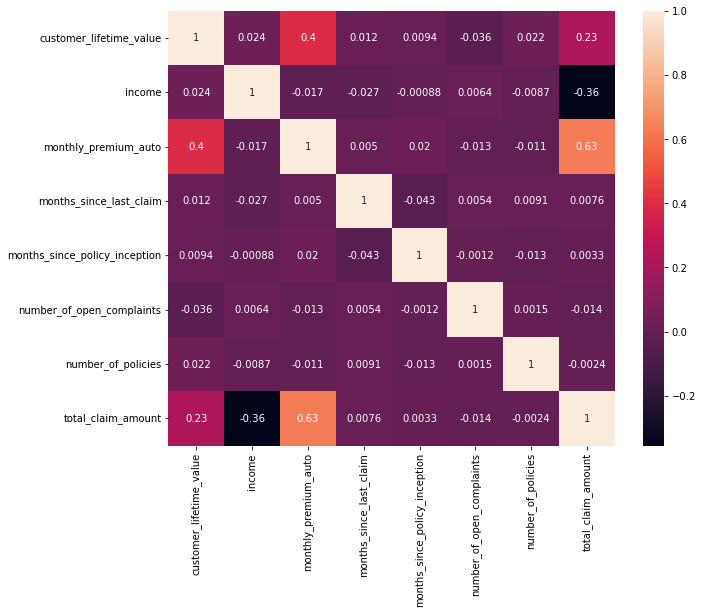

In [20]:
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(correlations, annot=True)
plt.show()

## Plots for variable types

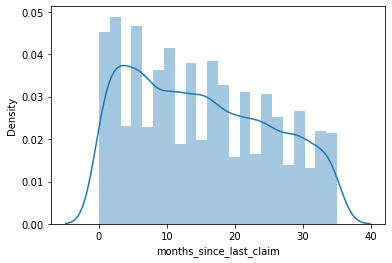

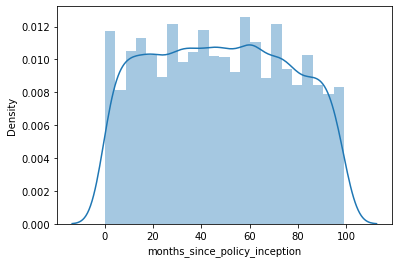

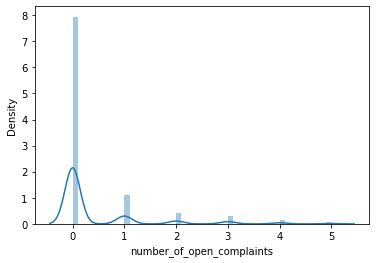

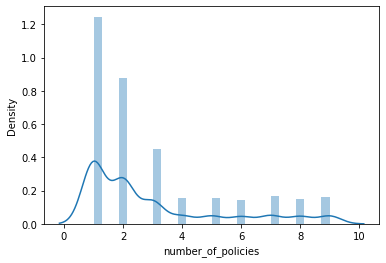

In [21]:
for column in numerical[discrete_lst]:
    sns.distplot(numerical[column])
    plt.show()

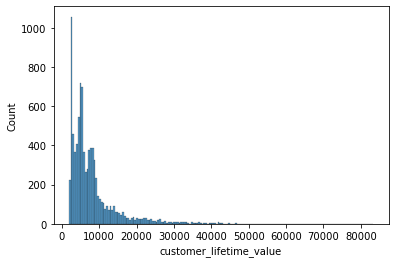

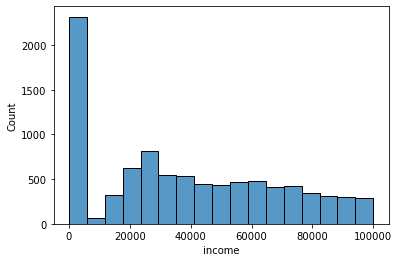

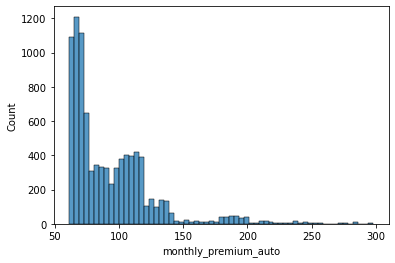

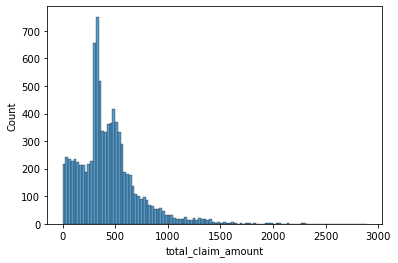

In [20]:
for column in numerical[continuous_lst]:
    sns.histplot(numerical[column])
    plt.show()

## OUTLIERS in continuous variables

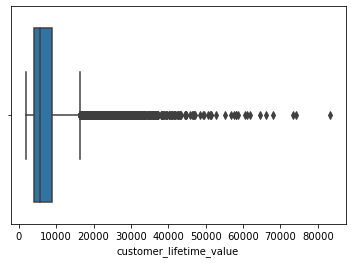

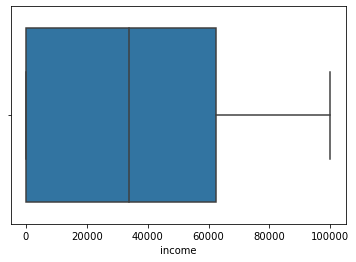

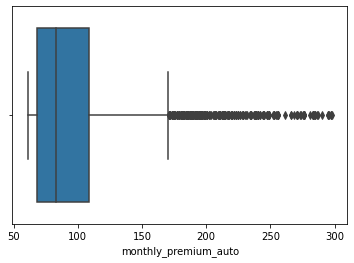

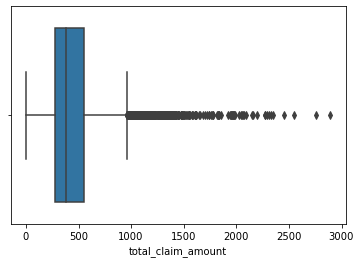

In [22]:
for column in numerical[continuous_lst]:
    sns.boxplot(numerical[column])
    plt.show()

In [23]:
def detect_outlier(column):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(column), [25, 75])
 
    # compute IQR
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in column if x <= lower_bound or x >= upper_bound]
 
    return outliers
 

In [28]:
# input data
tca_outliers = detect_outlier(numerical['total_claim_amount'])
mpa_outliers = detect_outlier(numerical['monthly_premium_auto'])

In [29]:
len(mpa_outliers)

430

In [25]:
#need to figure out if I want to drop

## Check for NaN values and make decisions

In [30]:
numerical.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [31]:
categorical.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

# Looking at Categorical features

In [32]:
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [33]:
# customer has all unique values, dropping before I plot
categorical= categorical.drop(['customer'], axis = 1)

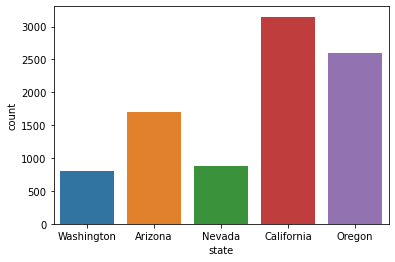

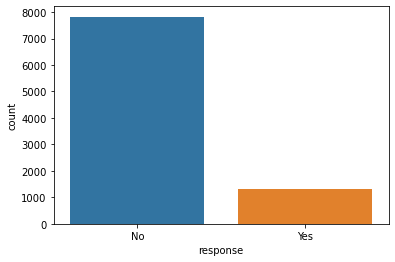

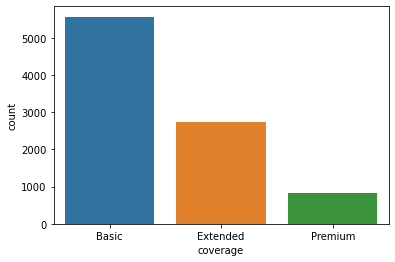

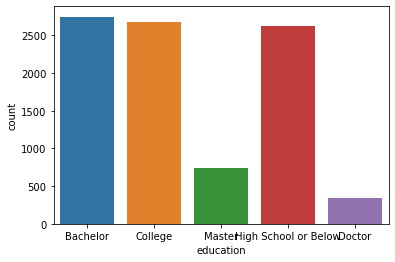

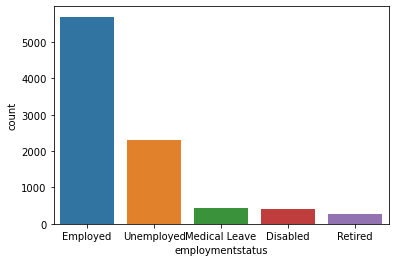

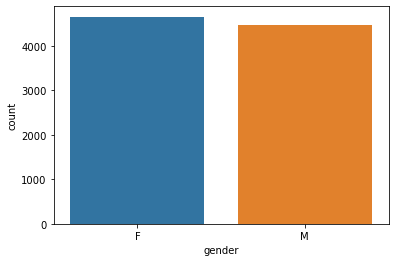

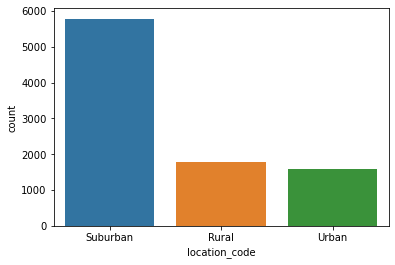

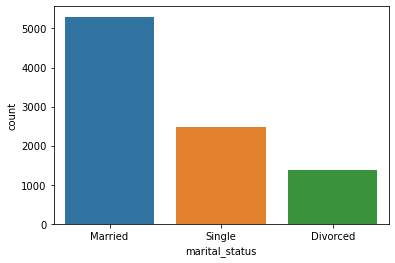

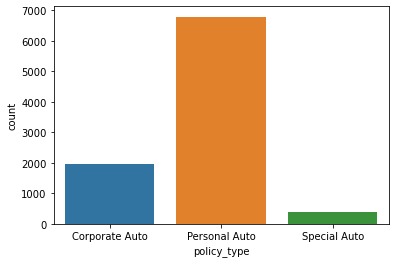

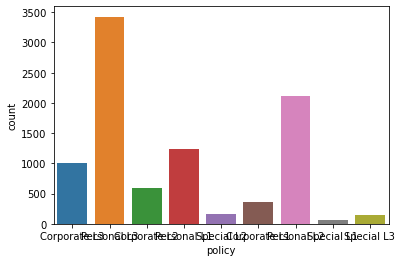

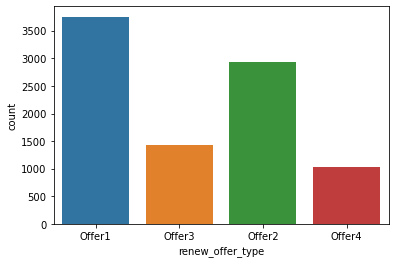

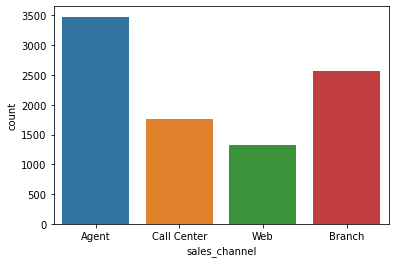

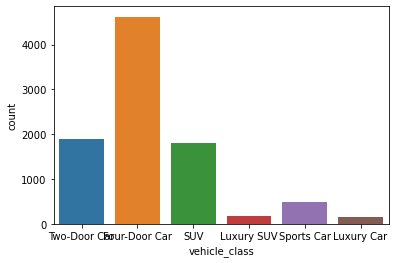

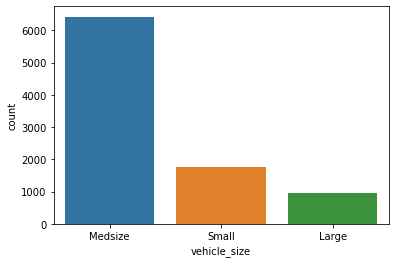

In [34]:
def cntplot_cat(df):
    for column in df.columns:
        sns.countplot(x=df[column])
        plt.show()
    return None
   

cntplot_cat(categorical)


# Insights into categorical data
column | decision
-------|---------
state | only 5 - leave as is
response | imbalanced make 1,0
coverage| ordinal encode
education | combine master & dr.
employment status | smallest 3 into other
gender | 1hot encode
location | ordinal encode as is
marital | 1hot encode as is
policy type | 1hot encode
policy | drop column
renew offer | encode as is
sales channel | 1hot encode as is
vehicle class | 1hot combine luxury/sports
vehicle size | ordinal encode

## Discrete variables

In [35]:
categorical_columns = [col for col in categorical if (len(categorical[col].unique()) < (categorical.shape[0] * 0.01))]

In [36]:
len(categorical_columns)

14

In [37]:
#categorical.loc[categorical["education"].isin(['Master','Doctor'])] = "Post-Uni"
need = categorical["education"].value_counts().index[:3]
categorical["education"] = np.where(categorical["education"].isin(need), categorical["education"], 'Post-Uni')
categorical["education"].value_counts(dropna=False)

Bachelor                2748
College                 2681
High School or Below    2622
Post-Uni                1083
Name: education, dtype: int64

In [38]:
need = categorical["vehicle_class"].value_counts().index[:3]
categorical["vehicle_class"] = np.where(categorical["vehicle_class"].isin(need), categorical["vehicle_class"], 'Luxury')
categorical["vehicle_class"].value_counts(dropna=False)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: vehicle_class, dtype: int64

In [39]:
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [40]:
categorical["policy_type"].value_counts(dropna=False)

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [41]:
categorical["policy"].value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [42]:
categorical = categorical.drop(['policy'], axis = 1)
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


In [64]:
# Saving the categorical at this point before encoding
categorical.to_csv('categorical_b4_encoding.csv', index=False)

## Concatenating numerical and categorical

In [65]:
X = pd.concat([numerical,categorical], axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,3096.511217,21604,79,14,28,0,1,379.200000,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,8163.890428,0,85,9,37,3,2,790.784983,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,7524.442436,21941,96,34,3,0,3,691.200000,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


## Train/test/split data
### Splitting / Scaling / 1Hot encoding X_train and X_test

In [66]:
y=X['total_claim_amount']
X=X.drop('total_claim_amount', axis=1)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_test shape is:', y_test.shape)

X_train shape is: (7307, 20)
y_train shape is: (7307,)
X_test shape is: (1827, 20)
y_test shape is: (1827,)


# Insights into categorical data
column | decision
-------|---------
state | only 5 - leave as is
response | imbalanced make 1,0
coverage| ordinal encode
education | combine master & dr.
employment status | smallest 3 into other
gender | 1hot encode
location | ordinal encode as is
marital | 1hot encode as is
policy type | 1hot encode
policy | drop column
renew offer | encode as is
sales channel | 1hot encode as is
vehicle class | 1hot combine luxury/sports
vehicle size | ordinal encode

7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

## Dummy code for ordinal encoding
#### data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [68]:
X_train["coverage"] = X_train["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})

In [69]:
X_test["coverage"] = X_test["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})

In [70]:
X_train['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [71]:
X_train["employmentstatus"] = X_train["employmentstatus"].map({"Medical Leave" : 0, "Disabled" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":1})


In [72]:
X_test["employmentstatus"] = X_test["employmentstatus"].map({"Medical Leave" : 0, "Disabled" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":1})

In [73]:
X_train['location_code'].unique()

array(['Rural', 'Urban', 'Suburban'], dtype=object)

In [74]:
X_train["location_code"] =X_train["location_code"].map({"Rural" : 0, "Suburban" :.5, "Urban" : 1,})

In [75]:
X_test["location_code"] =X_test["location_code"].map({"Rural" : 0, "Suburban" :.5, "Urban" : 1,})

In [76]:
X_train['vehicle_size'].unique()

array(['Large', 'Small', 'Medsize'], dtype=object)

In [77]:
X_train["vehicle_size"] =X_train["vehicle_size"].map({"Small" : 0, "Medsize" :.5, "Large" : 1,})

In [78]:
X_test["vehicle_size"] =X_test["vehicle_size"].map({"Small" : 0, "Medsize" :.5, "Large" : 1,})

In [79]:
X_train["education"].value_counts(dropna=False)

Bachelor                2185
College                 2172
High School or Below    2085
Post-Uni                 865
Name: education, dtype: int64

In [80]:
X_train["education"] = X_train["education"].map({"High School or Below" : 0, "College" :.33, "Bachelor" : .66,"Post-Uni" : 1})

In [81]:
X_test["education"] = X_test["education"].map({"High School or Below" : 0, "College" :.33, "Bachelor" : .66,"Post-Uni" : 1})

In [82]:
X_train["vehicle_class"].value_counts(dropna=False)

Four-Door Car    3726
Two-Door Car     1497
SUV              1432
Luxury            652
Name: vehicle_class, dtype: int64

In [83]:
X_train_1_hot_col = X_train[['state','response','gender','marital_status','policy_type','renew_offer_type','sales_channel','vehicle_class']]
X_train_1_hot_col

,state,response,gender,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class
1212,California,No,F,Single,Personal Auto,Offer1,Agent,Two-Door Car
5656,California,No,M,Married,Corporate Auto,Offer4,Call Center,Four-Door Car
7437,Oregon,No,M,Married,Corporate Auto,Offer3,Call Center,SUV
3274,California,Yes,F,Married,Personal Auto,Offer1,Agent,SUV
5153,California,No,M,Married,Corporate Auto,Offer1,Agent,SUV
...,...,...,...,...,...,...,...,...
5876,Oregon,No,F,Married,Personal Auto,Offer2,Agent,Four-Door Car
866,Arizona,No,M,Married,Personal Auto,Offer2,Web,Four-Door Car
7696,Oregon,No,M,Married,Personal Auto,Offer4,Web,Two-Door Car
74,Oregon,Yes,M,Divorced,Personal Auto,Offer2,Branch,Two-Door Car


In [84]:
X_test_1_hot_col = X_test[['state','response','gender','marital_status','policy_type','renew_offer_type','sales_channel','vehicle_class']]
X_test_1_hot_col

,state,response,gender,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class
791,California,No,M,Divorced,Personal Auto,Offer3,Branch,Two-Door Car
1822,Oregon,No,F,Divorced,Personal Auto,Offer3,Agent,Two-Door Car
4908,Oregon,No,F,Married,Personal Auto,Offer2,Branch,Four-Door Car
9100,California,No,M,Married,Personal Auto,Offer2,Call Center,Four-Door Car
6403,Oregon,No,F,Married,Personal Auto,Offer3,Call Center,SUV
...,...,...,...,...,...,...,...,...
5673,California,No,F,Divorced,Corporate Auto,Offer4,Call Center,SUV
102,Oregon,No,M,Single,Corporate Auto,Offer3,Call Center,Two-Door Car
2915,California,No,M,Married,Personal Auto,Offer2,Web,Luxury
7461,California,No,M,Single,Personal Auto,Offer4,Call Center,Two-Door Car


5. Encode the categorical variables (See the hint below for encoding categorical data!!!)

## OneHotEncode the remaining categorical columns

In [86]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
encoder = OneHotEncoder(drop='first').fit(X_train_1_hot_col)

cols = encoder.get_feature_names(input_features = X_train_1_hot_col.columns)

X_train_col_encoded = pd.DataFrame(encoder.transform(X_train_1_hot_col).toarray(),columns=cols)

X_train_col_encoded

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7303,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7304,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7305,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [88]:
cols1 = encoder.get_feature_names(input_features = X_test_1_hot_col.columns)

X_test_col_encoded = pd.DataFrame(encoder.transform( X_test_1_hot_col).toarray(),columns=cols1)

X_test_col_encoded

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1823,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1824,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1825,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [89]:
X_train = X_train.drop(['state','response','education','gender','marital_status','policy_type','renew_offer_type','sales_channel','vehicle_class'],axis = 1)
X_train=X_train.reset_index()
X_train

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,employmentstatus,location_code,vehicle_size
0,1212,5328.835851,81064,70,20,4,4,3,0.0,1.0,0.0,1.0
1,5656,2602.650842,41958,66,15,49,1,1,0.0,1.0,1.0,0.0
2,7437,4864.527356,37406,122,23,38,1,1,0.5,1.0,0.5,0.0
3,3274,8002.308333,0,107,3,65,0,3,0.0,0.0,0.5,0.5
4,5153,13345.135450,80277,112,6,40,1,2,0.0,1.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
7302,5876,4862.908979,36839,61,22,93,0,3,0.0,1.0,0.0,0.5
7303,866,3323.092454,70410,83,25,13,0,1,0.5,1.0,0.0,0.5
7304,7696,5935.572179,90263,74,17,36,0,8,0.0,1.0,0.5,0.5
7305,74,4974.801539,75644,65,5,68,3,9,0.0,1.0,0.5,0.5


In [90]:
X_test = X_test.drop(['state','response','education','gender','marital_status','policy_type','renew_offer_type','sales_channel','vehicle_class'],axis = 1)
X_test = X_test.reset_index()
X_test

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,employmentstatus,location_code,vehicle_size
0,791,2453.408288,83772,62,13,76,0,1,0.0,1.0,0.0,1.0
1,1822,8692.636838,97768,72,22,14,0,2,0.0,1.0,0.0,0.5
2,4908,5424.256733,67414,68,7,37,0,8,0.0,1.0,0.0,0.5
3,9100,3843.965188,43987,96,29,17,0,1,0.5,1.0,0.5,0.5
4,6403,4648.539191,0,121,11,10,0,1,0.5,0.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1822,5673,5535.963648,84863,138,28,40,0,1,0.5,1.0,0.5,1.0
1823,102,4762.817900,65795,62,2,85,1,3,0.0,1.0,0.0,0.5
1824,2915,6847.588918,0,191,2,70,0,1,0.0,0.0,0.5,0.5
1825,7461,3728.874098,0,69,21,54,5,3,0.0,0.0,0.5,0.5


In [91]:
X_train = X_train.drop('index', axis=1)
X_test = X_test.drop('index',axis=1)

In [92]:
X_train_encoded= pd.concat([X_train,X_train_col_encoded],axis=1)
X_train_encoded= X_train_encoded.reset_index()
X_train_encoded= X_train_encoded.drop('index',axis=1)

In [93]:
X_test_encoded= pd.concat([X_test,X_test_col_encoded],axis=1)
X_test_encoded= X_test_encoded.reset_index()
X_test_encoded= X_test_encoded.drop('index',axis=1)
X_test_encoded

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,employmentstatus,location_code,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,2453.408288,83772,62,13,76,0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,8692.636838,97768,72,22,14,0,2,0.0,1.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5424.256733,67414,68,7,37,0,8,0.0,1.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3843.965188,43987,96,29,17,0,1,0.5,1.0,0.5,0.5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4648.539191,0,121,11,10,0,1,0.5,0.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,5535.963648,84863,138,28,40,0,1,0.5,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1823,4762.817900,65795,62,2,85,1,3,0.0,1.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1824,6847.588918,0,191,2,70,0,1,0.0,0.0,0.5,0.5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1825,3728.874098,0,69,21,54,5,3,0.0,0.0,0.5,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Standardize needed columns

In [94]:
X_train.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
coverage                         float64
employmentstatus                 float64
location_code                    float64
vehicle_size                     float64
dtype: object

In [95]:
X_train_to_scale = X_train[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
X_train_to_scale
X_test_to_scale = X_test[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
X_test_to_scale


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2453.408288,83772,62,13,76,0,1
1,8692.636838,97768,72,22,14,0,2
2,5424.256733,67414,68,7,37,0,8
3,3843.965188,43987,96,29,17,0,1
4,4648.539191,0,121,11,10,0,1
...,...,...,...,...,...,...,...
1822,5535.963648,84863,138,28,40,0,1
1823,4762.817900,65795,62,2,85,1,3
1824,6847.588918,0,191,2,70,0,1
1825,3728.874098,0,69,21,54,5,3


### Initialize and fit the scaler

In [96]:
transformer = MinMaxScaler().fit(X_train_to_scale)

In [97]:
X_norm1 = transformer.transform(X_train_to_scale)
X_train_scaled = pd.DataFrame(X_norm1, columns=X_train_to_scale.columns)
X_train_scaled = X_train_scaled.reset_index()

In [124]:
X_train_scaled

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,0.042134,0.810794,0.038136,0.571429,0.040404,0.8,0.250
1,1,0.008654,0.419660,0.021186,0.428571,0.494949,0.2,0.000
2,2,0.036431,0.374131,0.258475,0.657143,0.383838,0.2,0.000
3,3,0.074966,0.000000,0.194915,0.085714,0.656566,0.0,0.250
4,4,0.140581,0.802923,0.216102,0.171429,0.404040,0.2,0.125
...,...,...,...,...,...,...,...,...
7302,7302,0.036412,0.368460,0.000000,0.628571,0.939394,0.0,0.250
7303,7303,0.017501,0.704234,0.093220,0.714286,0.131313,0.0,0.000
7304,7304,0.049585,0.902802,0.055085,0.485714,0.363636,0.0,0.875
7305,7305,0.037786,0.756584,0.016949,0.142857,0.686869,0.6,1.000


In [98]:
X_norm2 = transformer.transform(X_test_to_scale)
X_test_scaled = pd.DataFrame(X_norm2, columns=X_test_to_scale.columns)
X_test_scaled= X_test_scaled.reset_index()

In [99]:
X_train = X_train.drop(['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies'],axis = 1)
X_test = X_test.drop(['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies'], axis = 1)

In [100]:
X_train_s_e = pd.concat([X_train, X_train_scaled],axis = 1)
X_test_s_e = pd.concat([X_test, X_test_scaled], axis = 1)

In [101]:
X_train_s_e.isna().sum()

coverage                         0
employmentstatus                 0
location_code                    0
vehicle_size                     0
index                            0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

10. Use the function to check LinearRegressor and KNeighborsRegressor.

11. You can check also the MLPRegressor for this task!

##  Models

In [102]:
# Define function to run all models
def models_automation(models, X_tr, y_tr,X_te, y_te):
    for model in models:
        model.fit(X_tr, y_tr)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")


In [104]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train_s_e, y_train,X_test_s_e, y_test)

LinearRegression: Train -> 0.5908006353951993, Test -> 0.6030595738295871
SGDRegressor: Train -> -7.85136941086757e+25, Test -> -4.7596489809289024e+24
KNeighborsRegressor: Train -> 0.19926663210474438, Test -> -0.166368830741221
MLPRegressor: Train -> 0.4344277074814932, Test -> 0.48533490582645444
DecisionTreeRegressor: Train -> 1.0, Test -> 0.6565680072781761
RandomForestRegressor: Train -> 0.9733350420224248, Test -> 0.8162516004276783


Discussion: It appears the model performs better with linear regression model and random forest regressor. Other regression models do not perform well.

# Begin Lab 4.3

## Instructions

#### Open the categoricals variable we created before.
#### categoricals = data.select_dtypes(np.object)
#### categoricals.head()
#### Plot all the categorical variables with the proper plot. What can you see?
#### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
#### Plot time variable. Can you extract something from it?

In [105]:
cat = pd.read_csv('categorical_b4_encoding.csv')
cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


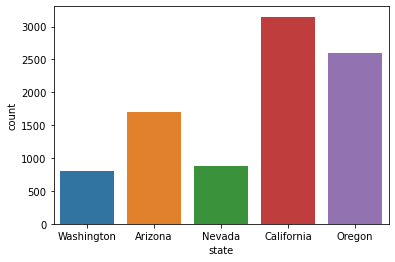

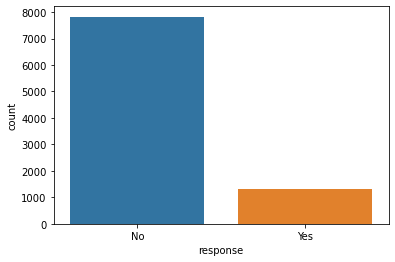

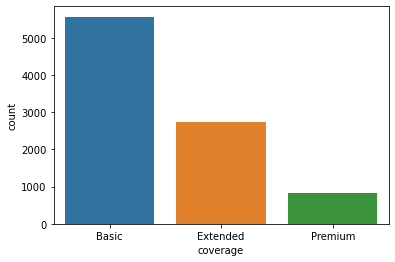

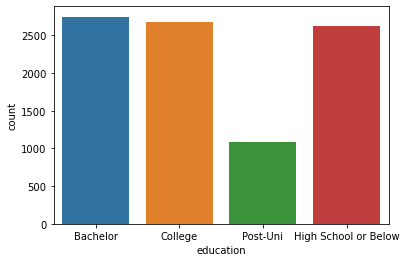

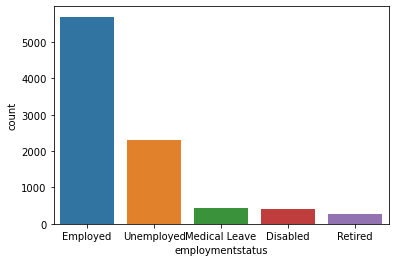

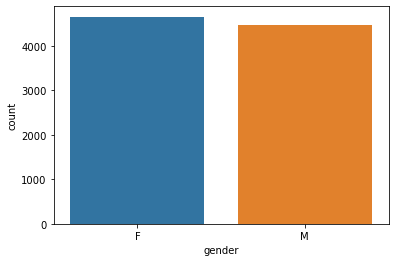

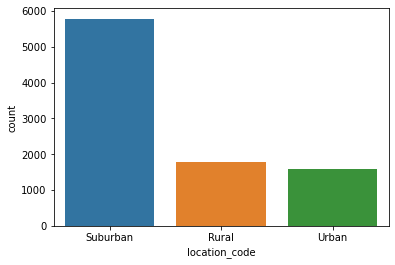

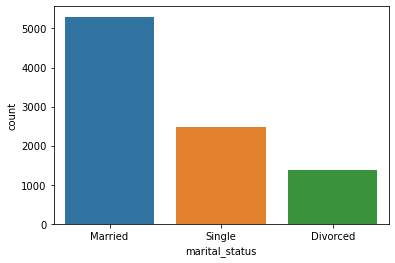

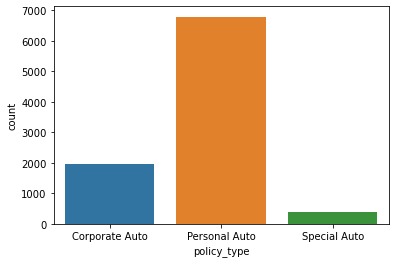

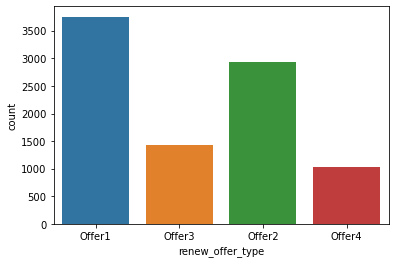

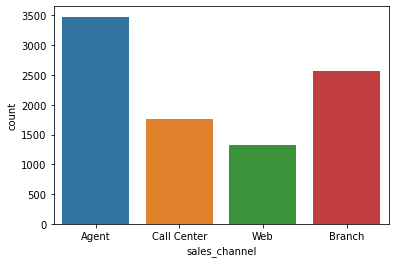

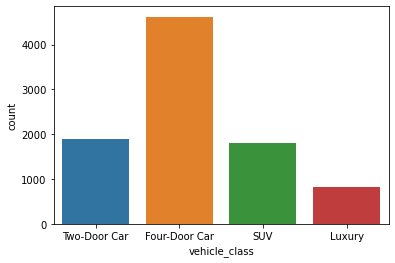

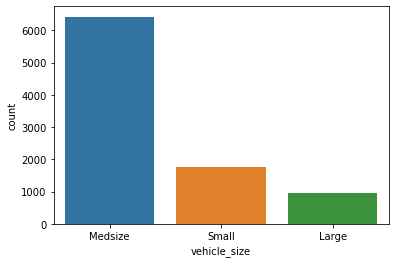

In [106]:
cntplot_cat(cat)

In [107]:
def dis_cat(df):
    for column in df.columns:
        sns.displot(x=df[column])
        plt.show()
    return None

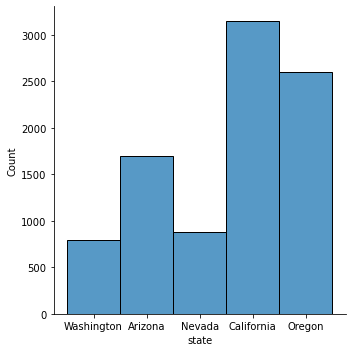

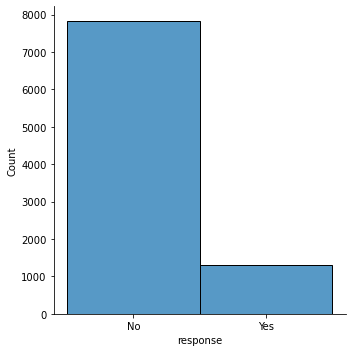

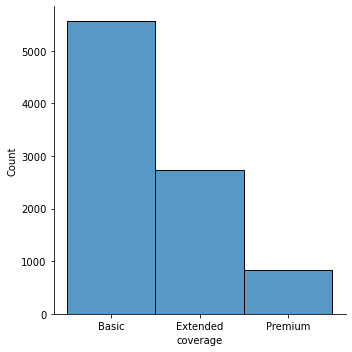

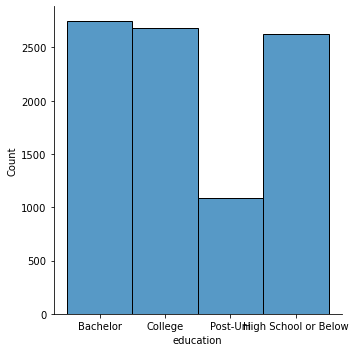

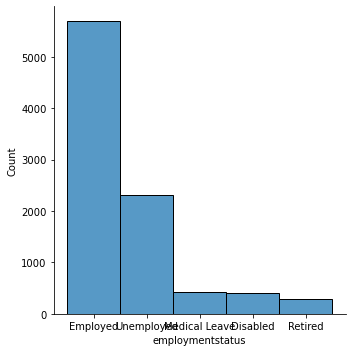

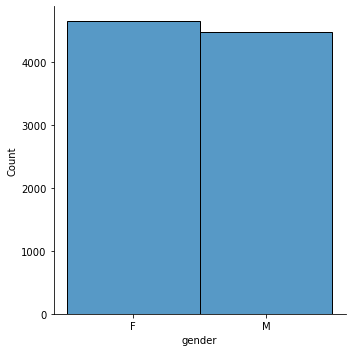

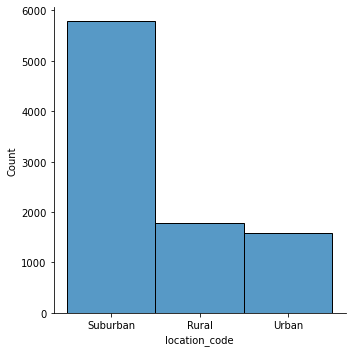

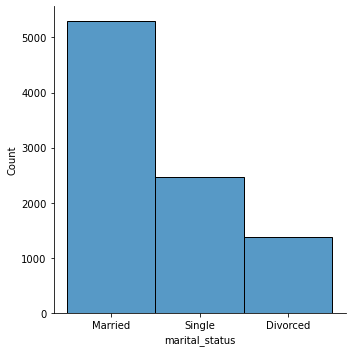

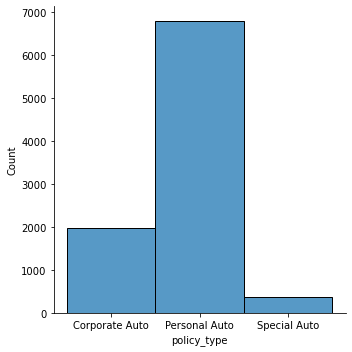

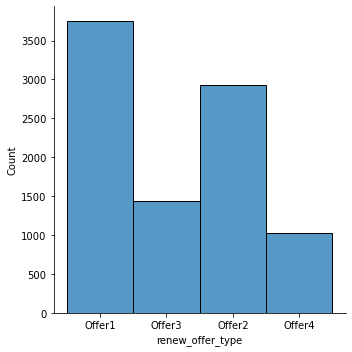

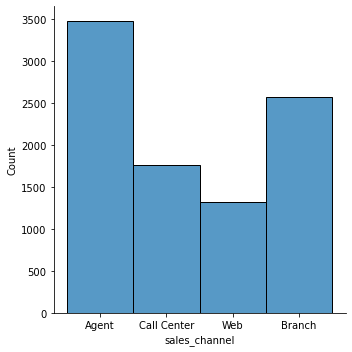

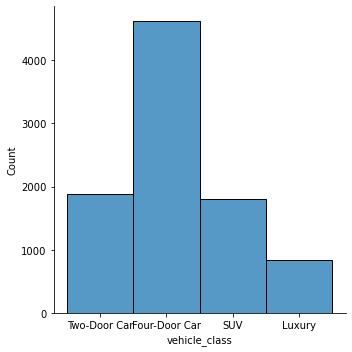

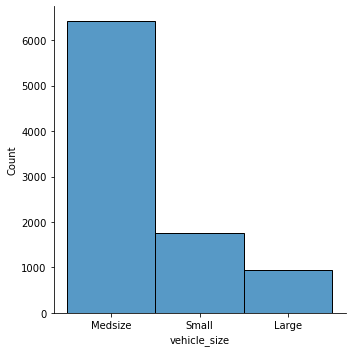

In [108]:
dis_cat(cat)

I can see different categories have different categorical values.

6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

## Checking the date column

In [109]:
df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

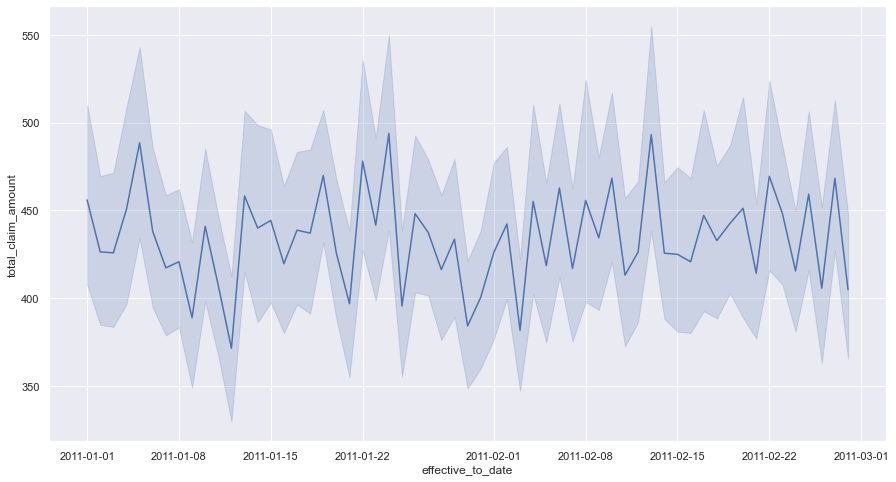

In [110]:
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(x="effective_to_date", y="total_claim_amount", data = df)

# Can't see clear pattern.  Let's create a df of just time features.

In [111]:
time_df = pd.DataFrame()
time_df["day"] = df["effective_to_date"].dt.day
time_df["week"] = df["effective_to_date"].dt.week
time_df["month"] = df["effective_to_date"].dt.month
time_df["target"] = df["total_claim_amount"]
time_df

,day,week,month,target
0,24,8,2,384.811147
1,31,5,1,1131.464935
2,19,7,2,566.472247
3,20,3,1,529.881344
4,3,5,2,138.130879
...,...,...,...,...
9129,10,6,2,198.234764
9130,12,6,2,379.200000
9131,6,5,2,790.784983
9132,3,5,2,691.200000


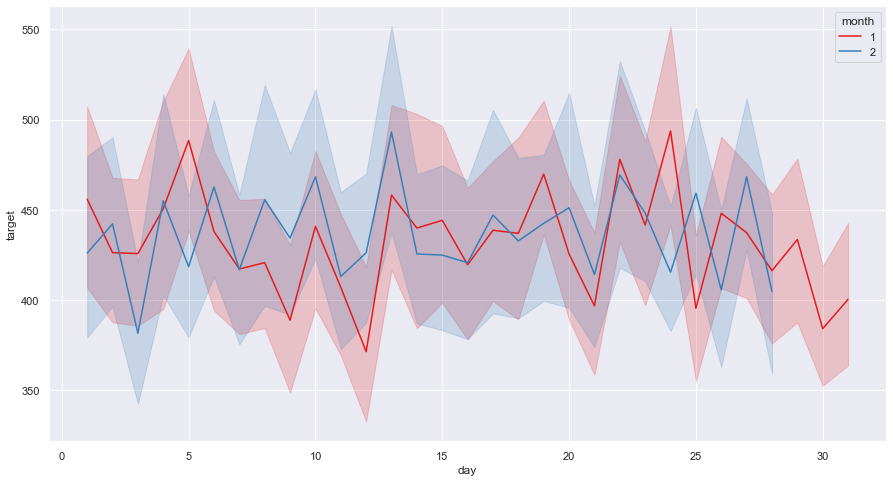

In [112]:
sns.lineplot(x = time_df.day, y=time_df.target, hue = time_df.month, palette="Set1");

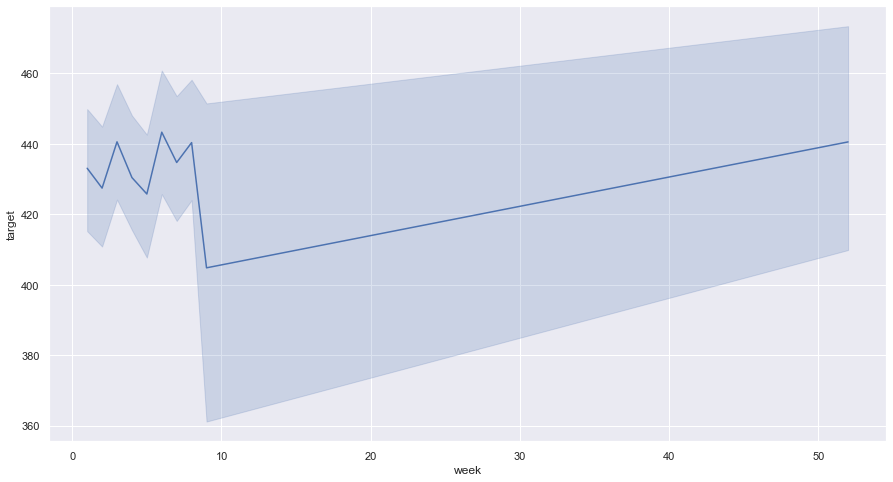

In [113]:
# Still not clear, check weeks
sns.lineplot(x = time_df.week, y = time_df.target);


In [114]:
# Error here.  This graph looks wonky. Check values.
time_df.week.value_counts()

4     1147
3     1137
5     1105
2     1079
8     1073
1     1049
7     1040
6     1035
52     308
9      161
Name: week, dtype: int64

In [115]:
# why the jump to 52?  Very out of sequence.  Check dates of week 52.
df.effective_to_date.loc[df.effective_to_date.dt.week[df.effective_to_date.dt.week == 52].index]

47     2011-01-02
60     2011-01-02
87     2011-01-01
133    2011-01-02
205    2011-01-02
          ...    
9041   2011-01-02
9063   2011-01-01
9085   2011-01-01
9091   2011-01-02
9103   2011-01-01
Name: effective_to_date, Length: 308, dtype: datetime64[ns]

In [116]:
# Looks like first week, check dates of week1 to see if sequential
df.effective_to_date.loc[df.effective_to_date.dt.week[df.effective_to_date.dt.week == 1].index]

11     2011-01-06
17     2011-01-05
36     2011-01-08
69     2011-01-09
106    2011-01-04
          ...    
9090   2011-01-07
9104   2011-01-09
9113   2011-01-06
9126   2011-01-09
9128   2011-01-06
Name: effective_to_date, Length: 1049, dtype: datetime64[ns]

In [117]:
# Yes it is, change 52 to 0
time_df.week = time_df.week.apply(lambda x: 0 if x == 52 else x)

<AxesSubplot:xlabel='week', ylabel='target'>

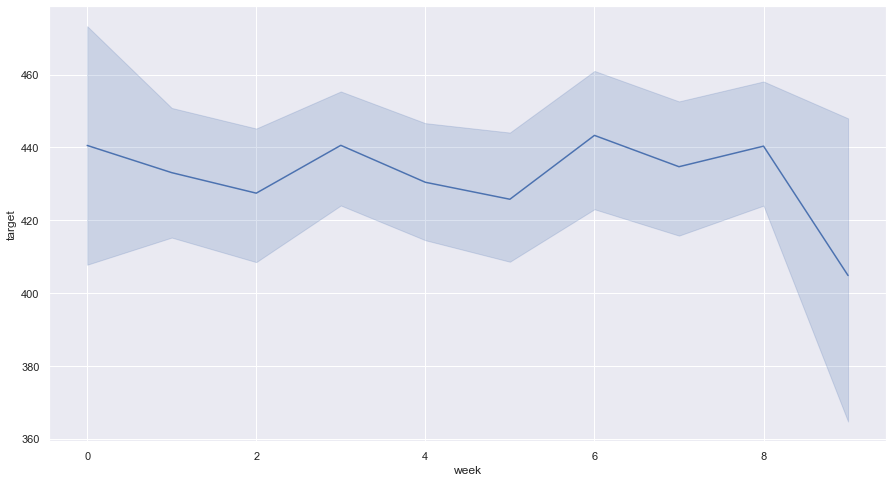

In [118]:
# plot again
sns.lineplot(x = time_df.week, y = time_df.target)

## Looks better
### Really not sure if I gained any knowledge from the date column

# Random variable Distributions

### Instructions
#### Get the numerical variables from our dataset.
#### Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
#### Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [119]:
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


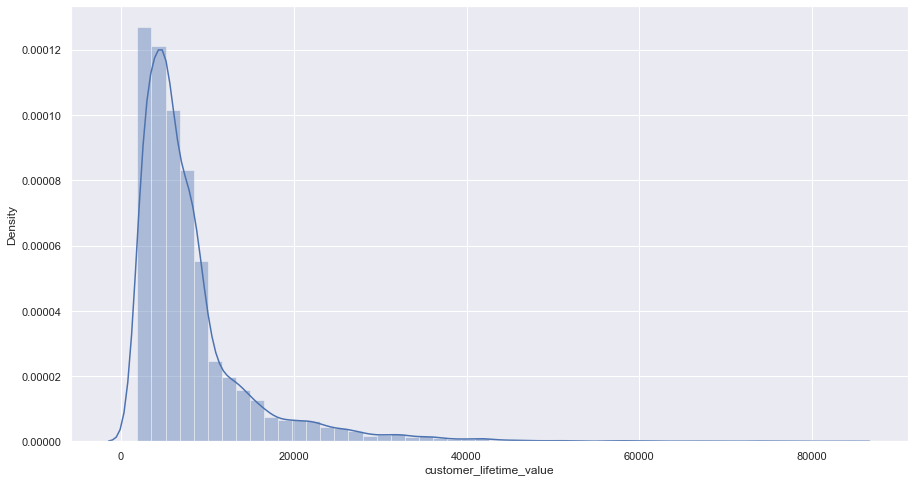

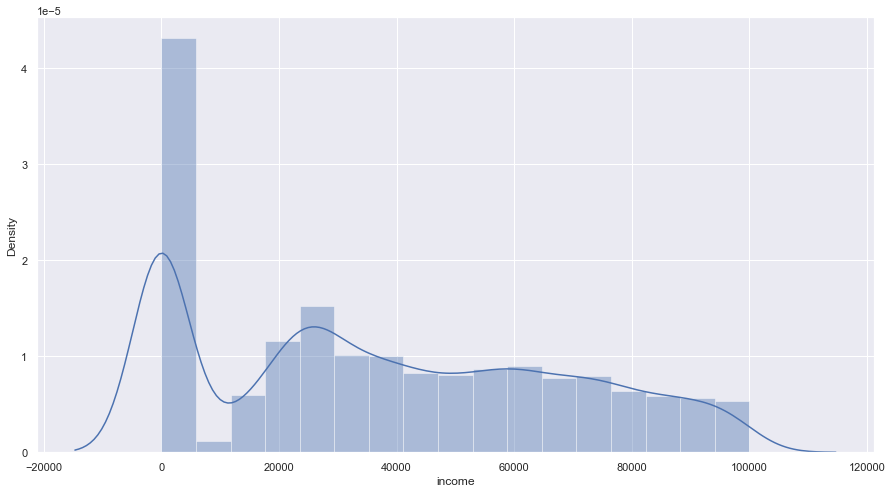

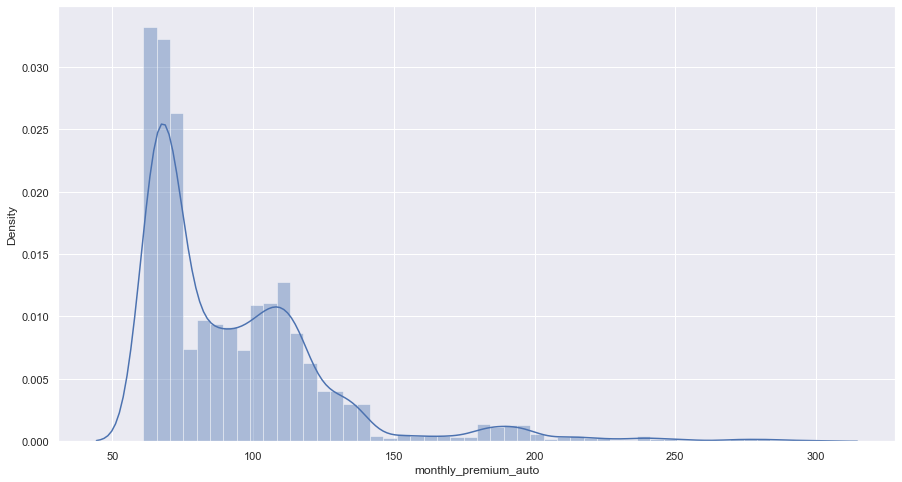

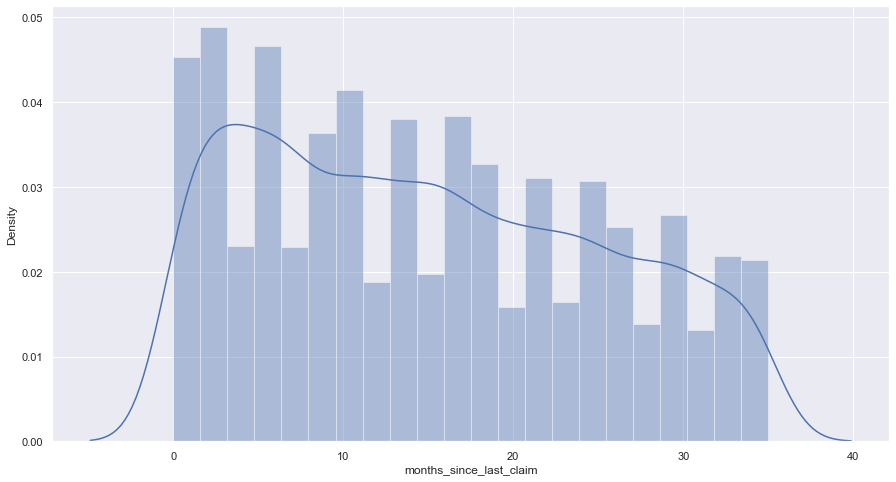

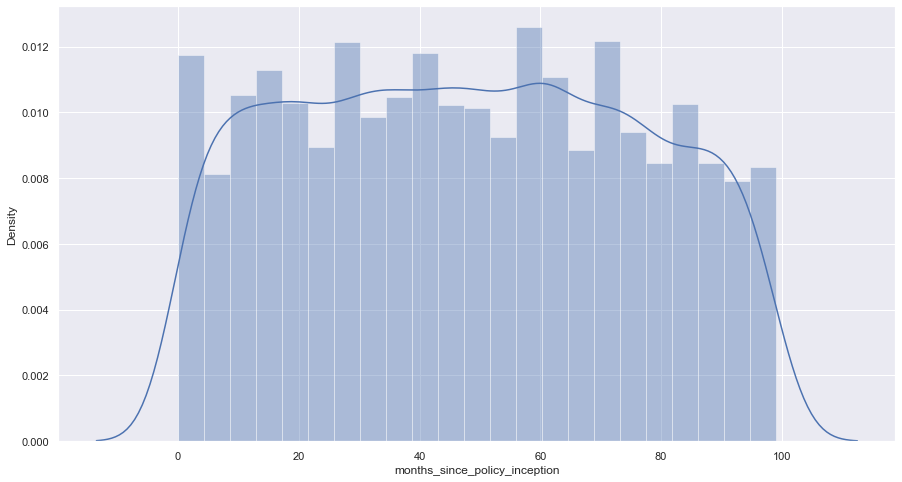

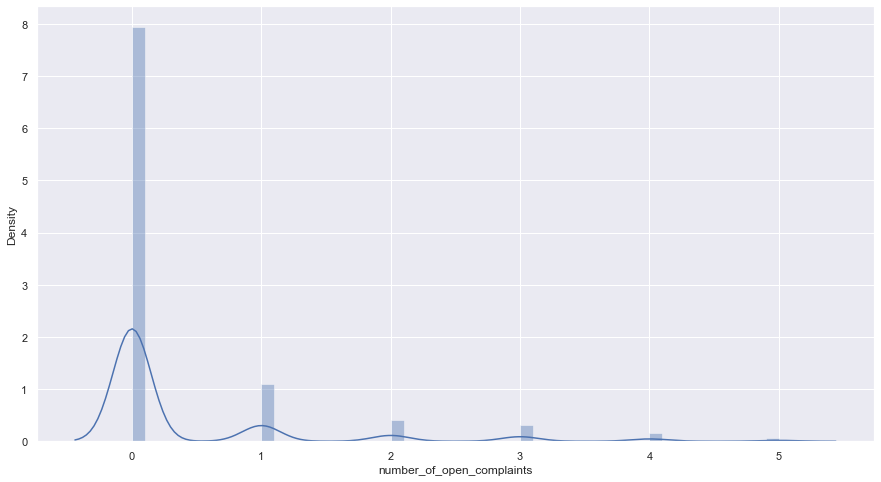

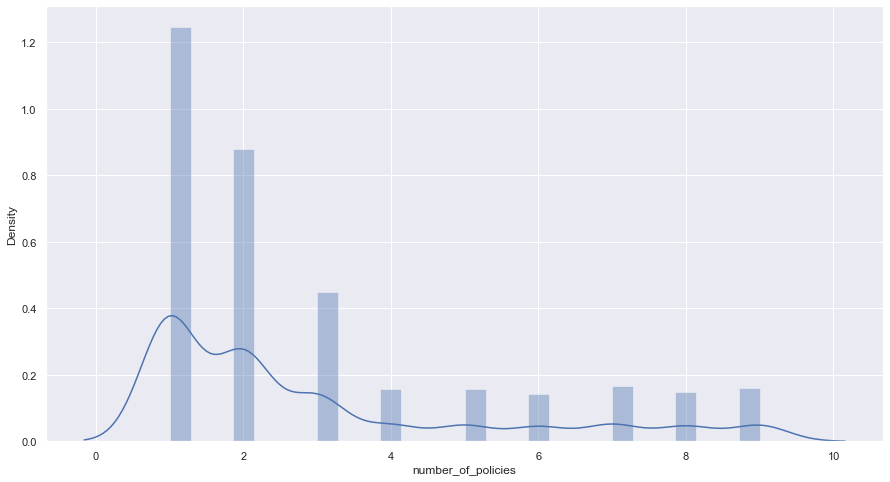

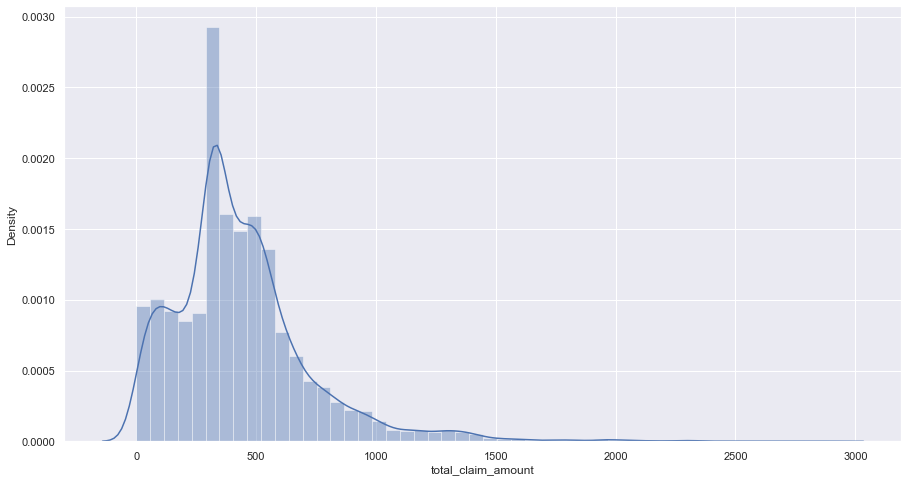

In [120]:
for column in numerical:
    sns.distplot(numerical[column])
    plt.show()

In [121]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

# Looking at Numerical Distributions
column | distribution
-------|---------
customer_lifetime_value | looks exponential / continuous
income | closer to normal
monthly_premium_auto| closer to normal
months_since_last_claim | closer to normal
months_since_policy_inception | closer to normal
number_of_open_complaints | closer to normal
number_of_policies | closer to normal
total_claim_amount | looks exponential / continuous


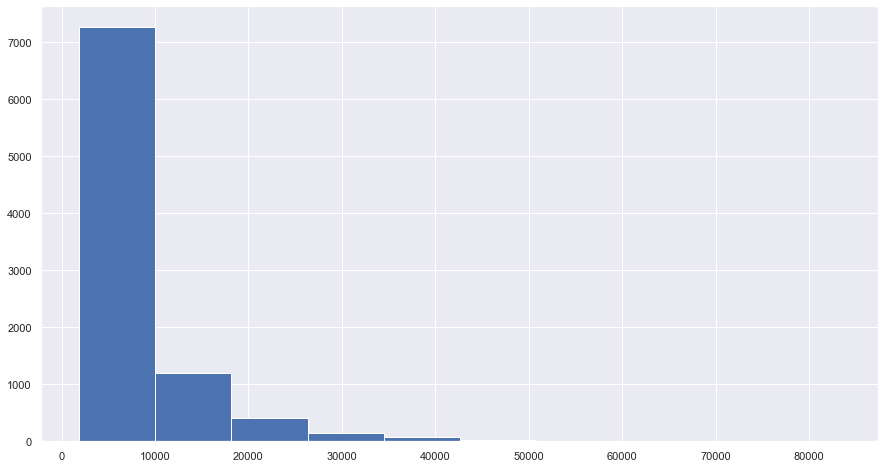

In [122]:
# https://stackoverflow.com/questions/53315215/transform-some-kind-of-exponential-distribution-into-normal-distribution
# from scipy.stats import boxcox
# tags_ratio = boxcox(tags_ratio, 0.3)
# plt.hist(tags_ratio)
# plt.show()

from scipy.stats import boxcox

X_train_s_e['customer_lifetime_value'] = boxcox(numerical['customer_lifetime_value'], 0.3)
plt.hist(numerical['customer_lifetime_value'])
plt.show()


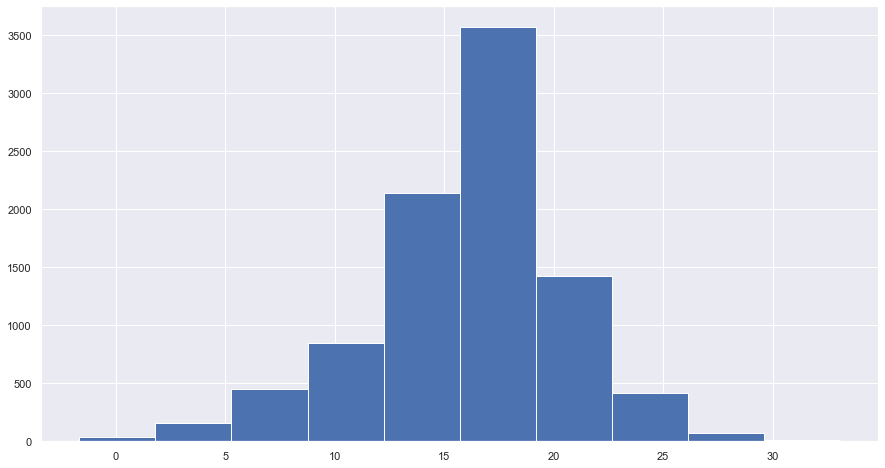

In [123]:
numerical['total_claim_amount'] = boxcox(numerical['total_claim_amount'], 0.3)
plt.hist(numerical['total_claim_amount'])
plt.show()